## **Data Visualization**<br>
#### Dataset penjualan mobil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Data from Drive

In [18]:
df = pd.read_csv('/content/drive/MyDrive/Data DS Bootcamp/dataset_penjualan_mobil.csv')
# Check information
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       3000 non-null   int64 
 1   Tanggal                  3000 non-null   object
 2   Merek                    3000 non-null   object
 3   Model                    3000 non-null   object
 4   Tahun Produksi           3000 non-null   int64 
 5   Jenis Mobil              3000 non-null   object
 6   Harga (Rp)               3000 non-null   int64 
 7   Warna                    3000 non-null   object
 8   Kota                     3000 non-null   object
 9   Provinsi                 3000 non-null   object
 10  Metode Pembayaran        3000 non-null   object
 11  Nama Dealer              3000 non-null   object
 12  Jenis Pelanggan          3000 non-null   object
 13  Umur Pelanggan           3000 non-null   int64 
 14  Jenis Kelamin            3000 non-null  

,ID,Tanggal,Merek,Model,Tahun Produksi,Jenis Mobil,Harga (Rp),Warna,Kota,Provinsi,...,Jenis Pelanggan,Umur Pelanggan,Jenis Kelamin,Asal Mobil,Waktu Tunggu (hari),Promo yang Digunakan,Nilai Tukar Tambah (Rp),Status Garansi Tambahan,Sumber Lead Penjualan,Kategori EV
0,1,09/03/2020,MG,MG4 EV,2020,Sedan,432208504,Putih,Makassar,Sulawesi Selatan,...,Perusahaan,57,P,Impor,1,Tanpa Promo,0,Ya,Instagram,EV
1,2,26/04/2020,Neta,V,2020,Sedan,381429689,Merah,Yogyakarta,DI Yogyakarta,...,Individu,30,P,Impor,23,Diskon Tahun Baru,15000000,Ya,Instagram,EV
2,3,06/07/2020,Wuling,Binguo EV,2020,Hatchback,768557621,Merah,Medan,Sumatera Utara,...,Perusahaan,41,L,Impor,21,Cashback Kredit,15000000,Tidak,Website Dealer,EV
3,4,22/07/2020,MG,MG4 EV,2020,SUV,424322305,Biru,Balikpapan,Kalimantan Timur,...,Individu,59,L,Impor,40,Tanpa Promo,25000000,Ya,Pameran,EV
4,5,18/07/2020,Neta,U,2020,Sedan,735663547,Merah,Pontianak,Kalimantan Barat,...,Perusahaan,25,L,Impor,39,Diskon Tahun Baru,0,Ya,Website Dealer,EV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,17/08/2024,Honda,Brio,2024,Pickup,308721878,Biru,Makassar,Sulawesi Selatan,...,Perusahaan,45,P,Impor,42,Promo Ramadhan,25000000,Tidak,Referensi,Non-EV
2996,2997,12/05/2024,Mitsubishi,Pajero Sport,2024,Hatchback,411613291,Silver,Palembang,Sumatera Selatan,...,Individu,36,P,Lokal,2,Diskon Tahun Baru,15000000,Tidak,Pameran,Non-EV
2997,2998,09/03/2024,Toyota,Fortuner,2024,Hatchback,189315554,Silver,Denpasar,Bali,...,Perusahaan,47,P,Lokal,37,Cashback Kredit,40000000,Tidak,Pameran,Non-EV
2998,2999,30/05/2024,Daihatsu,Xenia,2024,Sedan,400007626,Biru,Denpasar,Bali,...,Individu,30,P,Impor,26,Tanpa Promo,0,Ya,Instagram,Non-EV


### 1. Jumlah penjualan mobil berdasarkan tahun pembelian

In [19]:
# ambil nilai tahun dari 'Tanggal'
df['Tahun Pembelian'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y').dt.year
df.head()

,ID,Tanggal,Merek,Model,Tahun Produksi,Jenis Mobil,Harga (Rp),Warna,Kota,Provinsi,...,Umur Pelanggan,Jenis Kelamin,Asal Mobil,Waktu Tunggu (hari),Promo yang Digunakan,Nilai Tukar Tambah (Rp),Status Garansi Tambahan,Sumber Lead Penjualan,Kategori EV,Tahun Pembelian
0,1,09/03/2020,MG,MG4 EV,2020,Sedan,432208504,Putih,Makassar,Sulawesi Selatan,...,57,P,Impor,1,Tanpa Promo,0,Ya,Instagram,EV,2020
1,2,26/04/2020,Neta,V,2020,Sedan,381429689,Merah,Yogyakarta,DI Yogyakarta,...,30,P,Impor,23,Diskon Tahun Baru,15000000,Ya,Instagram,EV,2020
2,3,06/07/2020,Wuling,Binguo EV,2020,Hatchback,768557621,Merah,Medan,Sumatera Utara,...,41,L,Impor,21,Cashback Kredit,15000000,Tidak,Website Dealer,EV,2020
3,4,22/07/2020,MG,MG4 EV,2020,SUV,424322305,Biru,Balikpapan,Kalimantan Timur,...,59,L,Impor,40,Tanpa Promo,25000000,Ya,Pameran,EV,2020
4,5,18/07/2020,Neta,U,2020,Sedan,735663547,Merah,Pontianak,Kalimantan Barat,...,25,L,Impor,39,Diskon Tahun Baru,0,Ya,Website Dealer,EV,2020


In [37]:
pertahun = df['Tahun Pembelian'].value_counts().sort_index().reset_index()
pertahun

,Tahun Pembelian,count
0,2020,387
1,2021,453
2,2022,545
3,2023,775
4,2024,840


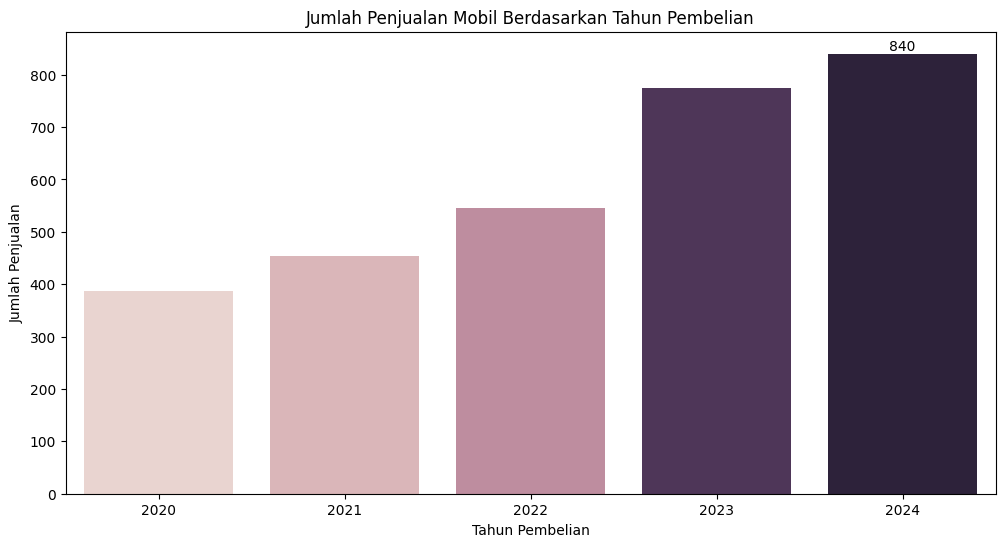

In [74]:
# Line chart untuk pembelian per tahun
plt.figure(figsize=(12,6))
ax = sns.barplot(pertahun, x='Tahun Pembelian', y='count', estimator='sum', hue='count', legend=None)
ax.bar_label(ax.containers[pertahun['count'].idxmax()], fontsize=10)
plt.title('Jumlah Penjualan Mobil Berdasarkan Tahun Pembelian')
plt.xlabel('Tahun Pembelian')
plt.ylabel('Jumlah Penjualan')
plt.show()

Kenaikan penjualan terjadi setiap tahun, dengan penjualan tertinggi pada tahun 2024

### 2. Proporsi penjualan mobil EV dengan non EV

In [87]:
proporsi = df['Kategori EV'].value_counts()
proporsi

,count
Kategori EV,
Non-EV,2100
EV,900


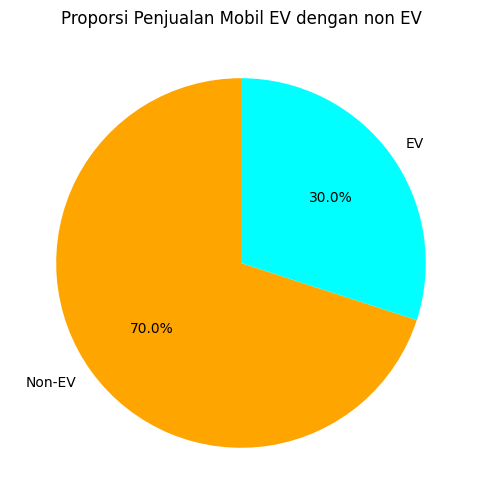

In [91]:
plt.figure(figsize=(12,6))
plt.pie(proporsi, labels=proporsi.index, autopct='%1.1f%%', startangle=90, colors=['orange','cyan'])
plt.title('Proporsi Penjualan Mobil EV dengan non EV')
plt.show()

Proporsi penjualan mobil tipe Non-EV lebih besar (70%) dibandingkan dengan EV (30%)

### 3. Heatmap untuk melihat distribusi penjualan mobil berdasarkan merek dan model

In [97]:
df_heatmap = df.groupby(['Merek', 'Model']).size().unstack(fill_value=0)
df_heatmap

Model,Air ev,Atto 3,Avanza,Binguo EV,Brio,Civic,Dolphin,Ertiga,Fortuner,HR-V,...,Pajero Sport,Seal,Terios,U,V,XL7,Xenia,Xpander,Yaris,ZS EV
Merek,,,,,,,,,,,,,,,,,,,,,
BYD,0,54,0,0,0,0,44,0,0,0,...,0,52,0,0,0,0,0,0,0,0
Daihatsu,0,0,0,0,0,0,0,0,0,0,...,0,0,213,0,0,0,193,0,0,0
Honda,0,0,0,0,146,130,0,0,0,150,...,0,0,0,0,0,0,0,0,0,0
Hyundai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,81
Mitsubishi,0,0,0,0,0,0,0,0,0,0,...,200,0,0,0,0,0,0,225,0,0
Neta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,100,90,0,0,0,0,0
Suzuki,0,0,0,0,0,0,0,152,0,0,...,0,0,0,0,0,126,0,0,0,0
Toyota,0,0,157,0,0,0,0,0,141,0,...,0,0,0,0,0,0,0,0,122,0


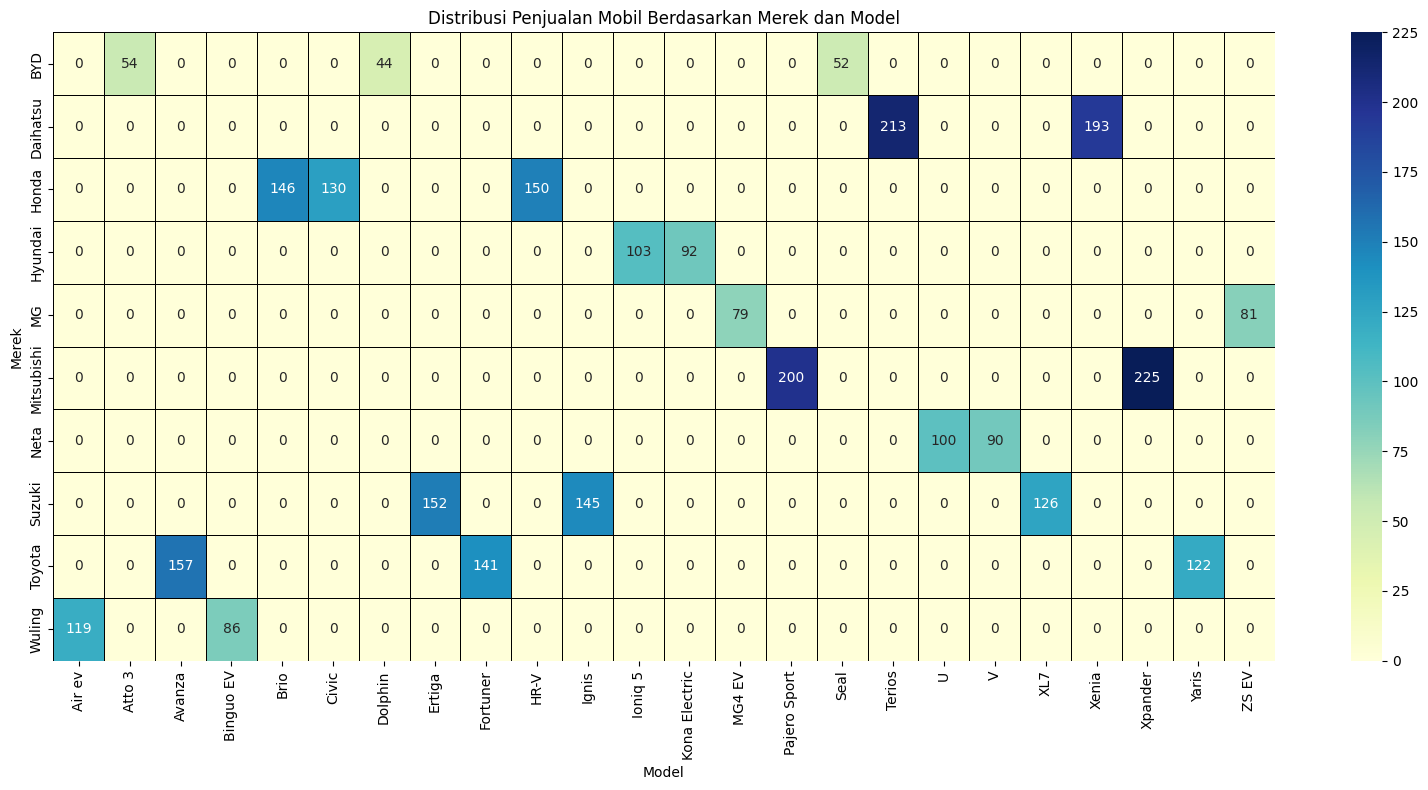

In [110]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_heatmap, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, linecolor='black')
plt.title('Distribusi Penjualan Mobil Berdasarkan Merek dan Model')
plt.xlabel('Model')
plt.ylabel('Merek')
plt.tight_layout()
plt.show()

Penjualan terbanyak pada merek Mitshubishi dengan model Xpander

### 4. Tren penjualan EV dari tahun ke tahun

In [112]:
ev_annual_trend = df[df['Kategori EV'] == 'EV'].groupby('Tahun Pembelian').size().reset_index()
ev_annual_trend

,Tahun Pembelian,0
0,2020,27
1,2021,63
2,2022,135
3,2023,315
4,2024,360


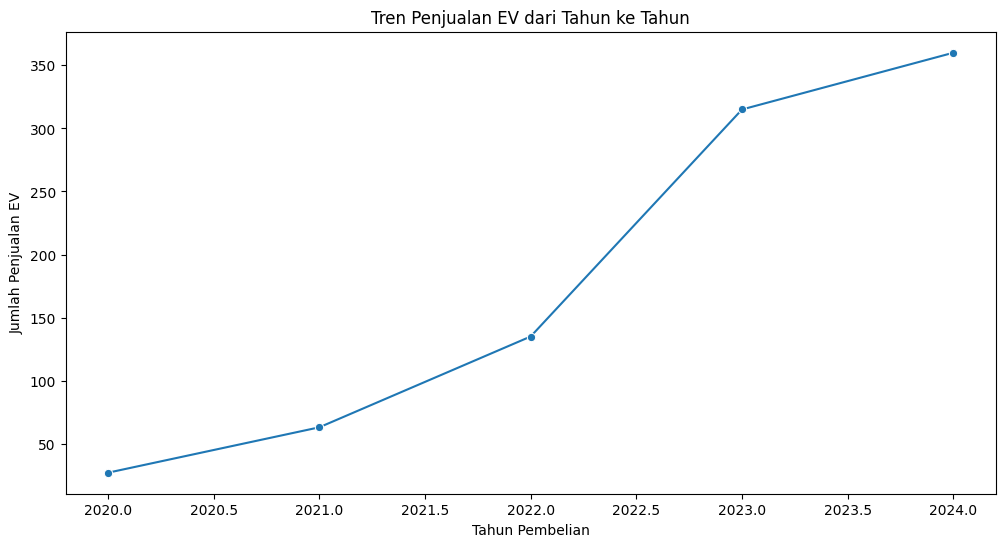

In [128]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ev_annual_trend, x='Tahun Pembelian', y=0, marker='o')
plt.title('Tren Penjualan EV dari Tahun ke Tahun')
plt.xlabel('Tahun Pembelian')
plt.ylabel('Jumlah Penjualan EV')
plt.show()

Tren penjualan EV mengalami kenaikan setiap tahun, dengan lonjakan tertinggi dari 2022 ke 2023

### 5. Kategori mobil yang paling populer dibeli oleh pelanggan wanita

In [144]:
f_car = df[(df['Jenis Kelamin']=="P")].reset_index()
f_popular = f_car['Jenis Mobil'].value_counts()
f_popular

,count
Jenis Mobil,
Hatchback,314
Sedan,310
Pickup,291
MPV,286
SUV,282


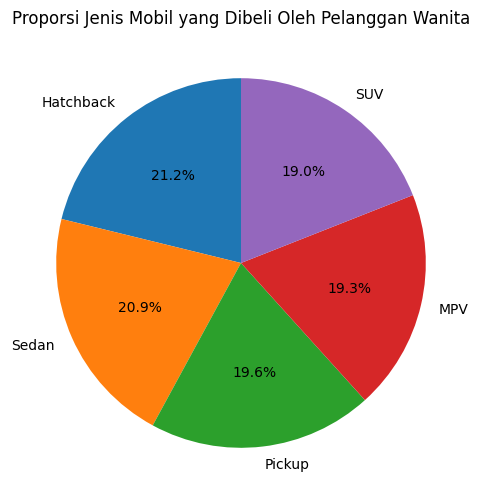

In [149]:
# Pie chart untuk memvisualisasikan
plt.figure(figsize=(12, 6))
plt.pie(f_popular, labels=f_popular.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Jenis Mobil yang Dibeli Oleh Pelanggan Wanita')
plt.show()

Jenis mobil yang paling banyak dibeli oleh wanita adalah Hatchback